In [17]:
import pandas as pd

train_data = pd.read_csv("../train.csv")

print(train_data.groupby("label")["id"].count())
label_counts = {key:count for key, count in train_data.groupby("label")["id"].count().items()}
label_counts = dict(sorted(label_counts.items(), key=lambda x:x[1], reverse=True))

label
no_relation                            9534
org:alternate_names                    1320
org:dissolved                            66
org:founded                             450
org:founded_by                          155
org:member_of                          1866
org:members                             420
org:number_of_employees/members          48
org:place_of_headquarters              1195
org:political/religious_affiliation      98
org:product                             380
org:top_members/employees              4284
per:alternate_names                    1001
per:children                            304
per:colleagues                          534
per:date_of_birth                      1130
per:date_of_death                       418
per:employee_of                        3573
per:origin                             1234
per:other_family                        190
per:parents                             520
per:place_of_birth                      166
per:place_of_death        

In [18]:
label_counts

{'no_relation': 9534,
 'org:top_members/employees': 4284,
 'per:employee_of': 3573,
 'per:title': 2103,
 'org:member_of': 1866,
 'org:alternate_names': 1320,
 'per:origin': 1234,
 'org:place_of_headquarters': 1195,
 'per:date_of_birth': 1130,
 'per:alternate_names': 1001,
 'per:spouse': 795,
 'per:colleagues': 534,
 'per:parents': 520,
 'org:founded': 450,
 'org:members': 420,
 'per:date_of_death': 418,
 'org:product': 380,
 'per:children': 304,
 'per:place_of_residence': 193,
 'per:other_family': 190,
 'per:place_of_birth': 166,
 'org:founded_by': 155,
 'per:product': 139,
 'per:siblings': 136,
 'org:political/religious_affiliation': 98,
 'per:religion': 96,
 'per:schools_attended': 82,
 'org:dissolved': 66,
 'org:number_of_employees/members': 48,
 'per:place_of_death': 40}

/var/folders/hx/bq5_r7cx2k1_bc2f1khgch9w0000gn/T/ipykernel_97140/2328849336.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(_x[1:], rotation=90)


[Text(0, 0, 'org:top_members/employees'),
 Text(1, 0, 'per:employee_of'),
 Text(2, 0, 'per:title'),
 Text(3, 0, 'org:member_of'),
 Text(4, 0, 'org:alternate_names'),
 Text(5, 0, 'per:origin'),
 Text(6, 0, 'org:place_of_headquarters'),
 Text(7, 0, 'per:date_of_birth'),
 Text(8, 0, 'per:alternate_names'),
 Text(9, 0, 'per:spouse'),
 Text(10, 0, 'per:colleagues'),
 Text(11, 0, 'per:parents'),
 Text(12, 0, 'org:founded'),
 Text(13, 0, 'org:members'),
 Text(14, 0, 'per:date_of_death'),
 Text(15, 0, 'org:product'),
 Text(16, 0, 'per:children'),
 Text(17, 0, 'per:place_of_residence'),
 Text(18, 0, 'per:other_family'),
 Text(19, 0, 'per:place_of_birth'),
 Text(20, 0, 'org:founded_by'),
 Text(21, 0, 'per:product'),
 Text(22, 0, 'per:siblings'),
 Text(23, 0, 'org:political/religious_affiliation'),
 Text(24, 0, 'per:religion'),
 Text(25, 0, 'per:schools_attended'),
 Text(26, 0, 'org:dissolved'),
 Text(27, 0, 'org:number_of_employees/members'),
 Text(28, 0, 'per:place_of_death')]

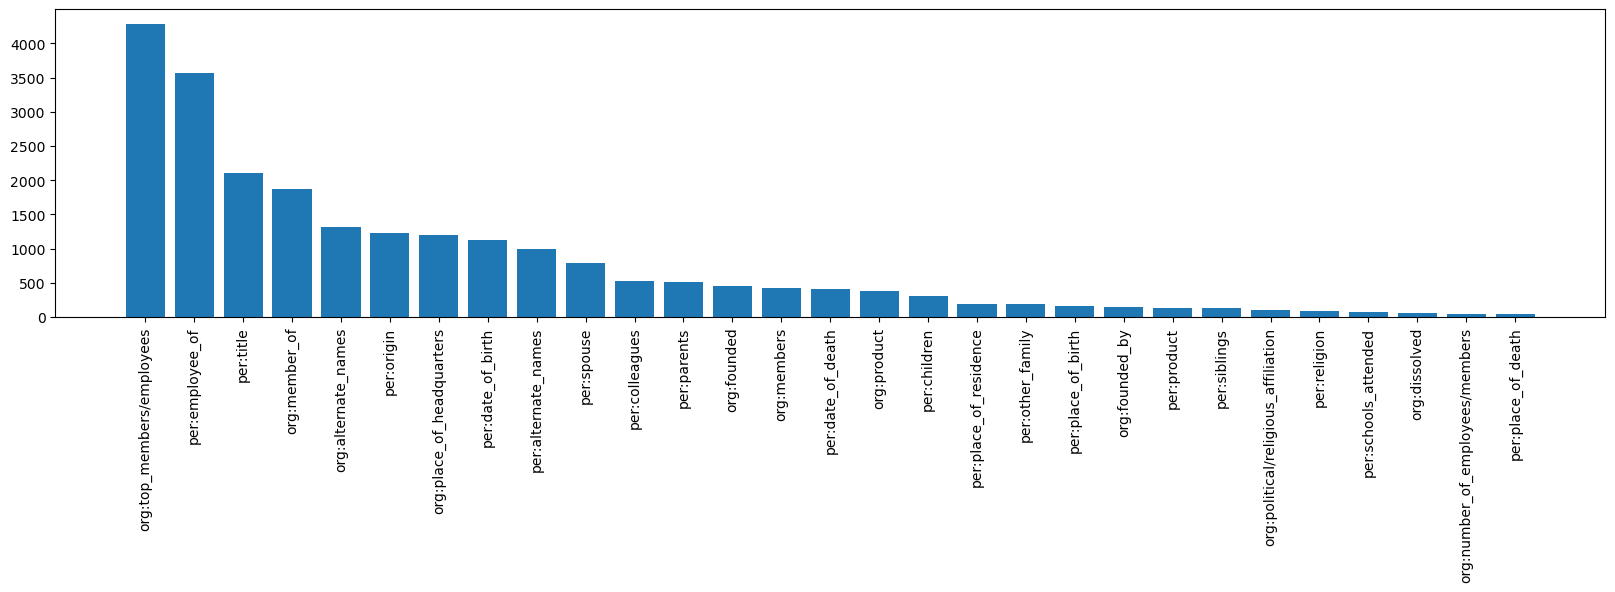

In [77]:
import matplotlib
import matplotlib.pyplot as plt

plt, axes = plt.subplots(1, 1, figsize=(20,4))
_x = list(label_counts.keys())
_y = list(label_counts.values())
axes.bar(_x[1:], _y[1:])
axes.set_xticklabels(_x[1:], rotation=90)

In [41]:
org, per = [], []
for key, count in train_data.groupby("label")["id"].count().items():
    if "per" in key:    per.append(count)
    else:               org.append(count)
print(f"Sum of org: {sum(org)}\nSum of per: {sum(per)}")
print(f"Property of org: {sum(org)/(sum(org)+sum(per))*100}\nSum of per: {sum(per)/(sum(org)+sum(per))*100}")


Sum of org: 19816
Sum of per: 12654
Property of org: 61.02864182322143
Sum of per: 38.971358176778566


In [46]:
# unique TYPE 확인하기
num_obj_unique = train_data.groupby("object_entity")["id"].count().keys().nunique()
num_train_data = len(train_data)

print(num_obj_unique, num_train_data)
# -> 중복된 object entity 많이 있음(당연한 거긴 한데)

25704 32470


In [6]:
# unique TYPE 확인하기(object entity 안에서)
import pandas as pd
def make_new_column(df):
    for type_entity in ['subject', 'object']:
        column = f"{type_entity}_entity"

        word_list, type_list = [], []
        start_idx_list, end_idx_list = [], []

        for i in range(len(df)):
            dictionary = eval(df.iloc[i][column])

            word_list.append(dictionary['word'])
            start_idx_list.append(dictionary['start_idx'])
            end_idx_list.append(dictionary['end_idx'])
            type_list.append(dictionary['type'])

        df[column] = word_list
        for key in ['start_idx', 'end_idx', 'type']:
            df[f"{type_entity}_{key}"] = eval(f"{key}_list")
    
    return df

train_data = pd.read_csv("./train.csv").copy(deep=True)
#print(train_data.head(5))
train_data = make_new_column(train_data)
print(train_data['object_type'].unique())
print(train_data['subject_type'].unique())
print(train_data.groupby('object_type')["id"].count())



['PER' 'ORG' 'DAT' 'LOC' 'POH' 'NOH']
['ORG' 'PER']
object_type
DAT    4249
LOC    3561
NOH     413
ORG    9346
PER    9788
POH    5113
Name: id, dtype: int64


<BarContainer object of 6 artists>

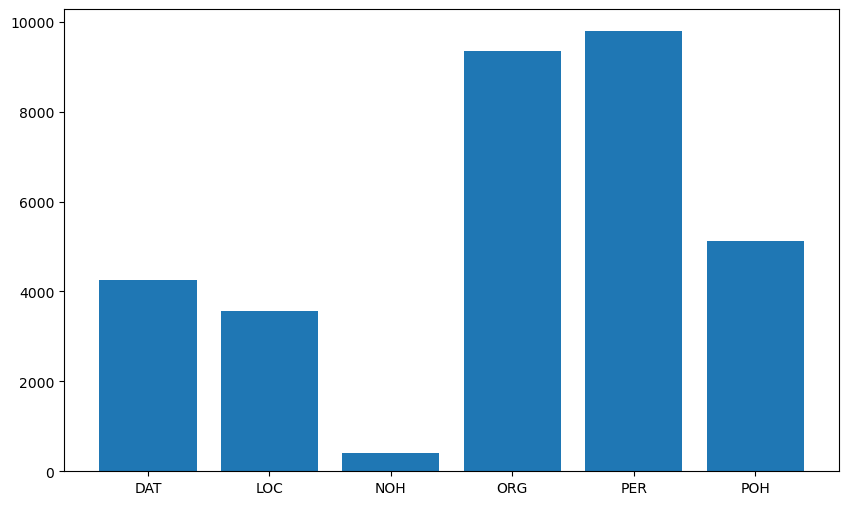

In [7]:
import matplotlib
import matplotlib.pyplot as plt

_x = list(train_data.groupby('object_type')["id"].count().keys())
_y = list(train_data.groupby('object_type')["id"].count().values)
fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.bar(_x, _y)

In [72]:
train_data.groupby('object_type')["id"].count().values

array([4249, 3561,  413, 9346, 9788, 5113])

In [88]:
train_data.head(5)

,id,sentence,subject_entity,object_entity,label,source,subject_start_idx,subject_end_idx,subject_type,object_start_idx,object_end_idx,object_type
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨,no_relation,wikipedia,24,26,ORG,13,18,PER
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당,no_relation,wikitree,19,23,ORG,14,17,ORG
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹,org:member_of,wikitree,21,24,ORG,34,41,ORG
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부,org:top_members/employees,wikitree,13,17,ORG,22,24,PER
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967,no_relation,wikipedia,22,30,ORG,0,3,DAT


In [9]:
# sub-obj 조합에 따른 라벨 분포 확인하기 1: 라벨에 따른 특정 조합이 정해져있는가? -> yes

sub_obj_type = []
for idx, item in train_data.iterrows():
    sub = item['subject_type']
    obj = item['object_type']
    sub_obj_type.append(sub+"_"+obj)


train_data['sub_obj_type'] = sub_obj_type
# train_data.head(5)

relation_unique = train_data['sub_obj_type'].unique()

for label in sorted(train_data['label'].unique()):
    relation_in_label = sorted(list(train_data[train_data['label']==label]['sub_obj_type'].unique()))
    properties = len(relation_in_label)/len(relation_unique) * 100
    print(f"<{label}> :\t{relation_in_label}\n<{label}>은 전체 조합의 {properties}% 가 포함합니다.\n")


<no_relation> :	['ORG_DAT', 'ORG_LOC', 'ORG_NOH', 'ORG_ORG', 'ORG_PER', 'ORG_POH', 'PER_DAT', 'PER_LOC', 'PER_NOH', 'PER_ORG', 'PER_PER', 'PER_POH']
<no_relation>은 전체 조합의 100.0% 가 포함합니다.

<org:alternate_names> :	['ORG_DAT', 'ORG_LOC', 'ORG_NOH', 'ORG_ORG', 'ORG_PER', 'ORG_POH']
<org:alternate_names>은 전체 조합의 50.0% 가 포함합니다.

<org:dissolved> :	['ORG_DAT']
<org:dissolved>은 전체 조합의 8.333333333333332% 가 포함합니다.

<org:founded> :	['ORG_DAT']
<org:founded>은 전체 조합의 8.333333333333332% 가 포함합니다.

<org:founded_by> :	['ORG_ORG', 'ORG_PER', 'ORG_POH', 'PER_LOC']
<org:founded_by>은 전체 조합의 33.33333333333333% 가 포함합니다.

<org:member_of> :	['ORG_DAT', 'ORG_LOC', 'ORG_NOH', 'ORG_ORG', 'ORG_PER', 'ORG_POH']
<org:member_of>은 전체 조합의 50.0% 가 포함합니다.

<org:members> :	['ORG_DAT', 'ORG_LOC', 'ORG_NOH', 'ORG_ORG', 'ORG_PER', 'ORG_POH', 'PER_PER']
<org:members>은 전체 조합의 58.333333333333336% 가 포함합니다.

<org:number_of_employees/members> :	['ORG_NOH']
<org:number_of_employees/members>은 전체 조합의 8.333333333333332% 가 포함합니다.

<org:

In [10]:
train_data['label'].unique()

array(['no_relation', 'org:member_of', 'org:top_members/employees',
       'org:alternate_names', 'per:date_of_birth',
       'org:place_of_headquarters', 'per:employee_of', 'per:origin',
       'per:title', 'org:members', 'per:schools_attended',
       'per:colleagues', 'per:alternate_names', 'per:spouse',
       'org:founded_by', 'org:political/religious_affiliation',
       'per:children', 'org:founded', 'org:number_of_employees/members',
       'per:place_of_birth', 'org:dissolved', 'per:parents',
       'per:religion', 'per:date_of_death', 'per:place_of_residence',
       'per:other_family', 'org:product', 'per:siblings', 'per:product',
       'per:place_of_death'], dtype=object)

In [11]:
# sub-obj 조합에 따른 라벨 분포 확인하기 2: 특정 조합은 특정 라벨에만 한정되는가?

# 이따 비율도 알아봐야겠다.
relation_unique = sorted(list(train_data['sub_obj_type'].unique()))
labels = train_data['label'].unique()

for relation in relation_unique:
    label_unique = train_data[train_data['sub_obj_type']==relation]['label'].unique()
    print(f"<{relation}> 조합은 {sorted(list(label_unique))} 로 라벨링되어있습니다. \n이는 전체의 {len(label_unique)/len(labels)*100}% 입니다.\n")


<ORG_DAT> 조합은 ['no_relation', 'org:alternate_names', 'org:dissolved', 'org:founded', 'org:member_of', 'org:members', 'org:place_of_headquarters', 'org:political/religious_affiliation'] 로 라벨링되어있습니다. 
이는 전체의 26.666666666666668% 입니다.

<ORG_LOC> 조합은 ['no_relation', 'org:alternate_names', 'org:member_of', 'org:members', 'org:place_of_headquarters', 'org:political/religious_affiliation', 'org:product', 'org:top_members/employees'] 로 라벨링되어있습니다. 
이는 전체의 26.666666666666668% 입니다.

<ORG_NOH> 조합은 ['no_relation', 'org:alternate_names', 'org:member_of', 'org:members', 'org:number_of_employees/members', 'org:place_of_headquarters', 'org:product', 'org:top_members/employees'] 로 라벨링되어있습니다. 
이는 전체의 26.666666666666668% 입니다.

<ORG_ORG> 조합은 ['no_relation', 'org:alternate_names', 'org:founded_by', 'org:member_of', 'org:members', 'org:place_of_headquarters', 'org:political/religious_affiliation', 'org:product', 'org:top_members/employees'] 로 라벨링되어있습니다. 
이는 전체의 30.0% 입니다.

<ORG_PER> 조합은 ['no_relation', 'org:a

In [12]:
#len(train_data['label'].unique())  # 30
len(sorted(list(train_data['sub_obj_type'].unique())))  # 12

12

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

plt.style.use('seaborn')
from matplotlib import rc, font_manager
style.use("fivethirtyeight")
style.use("seaborn-talk")
plt.rcParams['font.family'] = 'serif'

import pickle

import re

from ast import literal_eval

import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

index explained:

(0) -> no_relation		(1) -> org:top_members/employees
(2) -> org:members		(3) -> org:product
(4) -> per:title		(5) -> org:alternate_names
(6) -> per:employee_of		(7) -> org:place_of_headquarters
(8) -> per:product		(9) -> org:number_of_employees/members
(10) -> per:children		(11) -> per:place_of_residence
(12) -> per:alternate_names		(13) -> per:other_family
(14) -> per:colleagues		(15) -> per:origin
(16) -> per:siblings		(17) -> per:spouse
(18) -> org:founded		(19) -> org:political/religious_affiliation
(20) -> org:member_of		(21) -> per:parents
(22) -> org:dissolved		(23) -> per:schools_attended
(24) -> per:date_of_death		(25) -> per:date_of_birth
(26) -> per:place_of_birth		(27) -> per:place_of_death
(28) -> org:founded_by		(29) -> per:religion


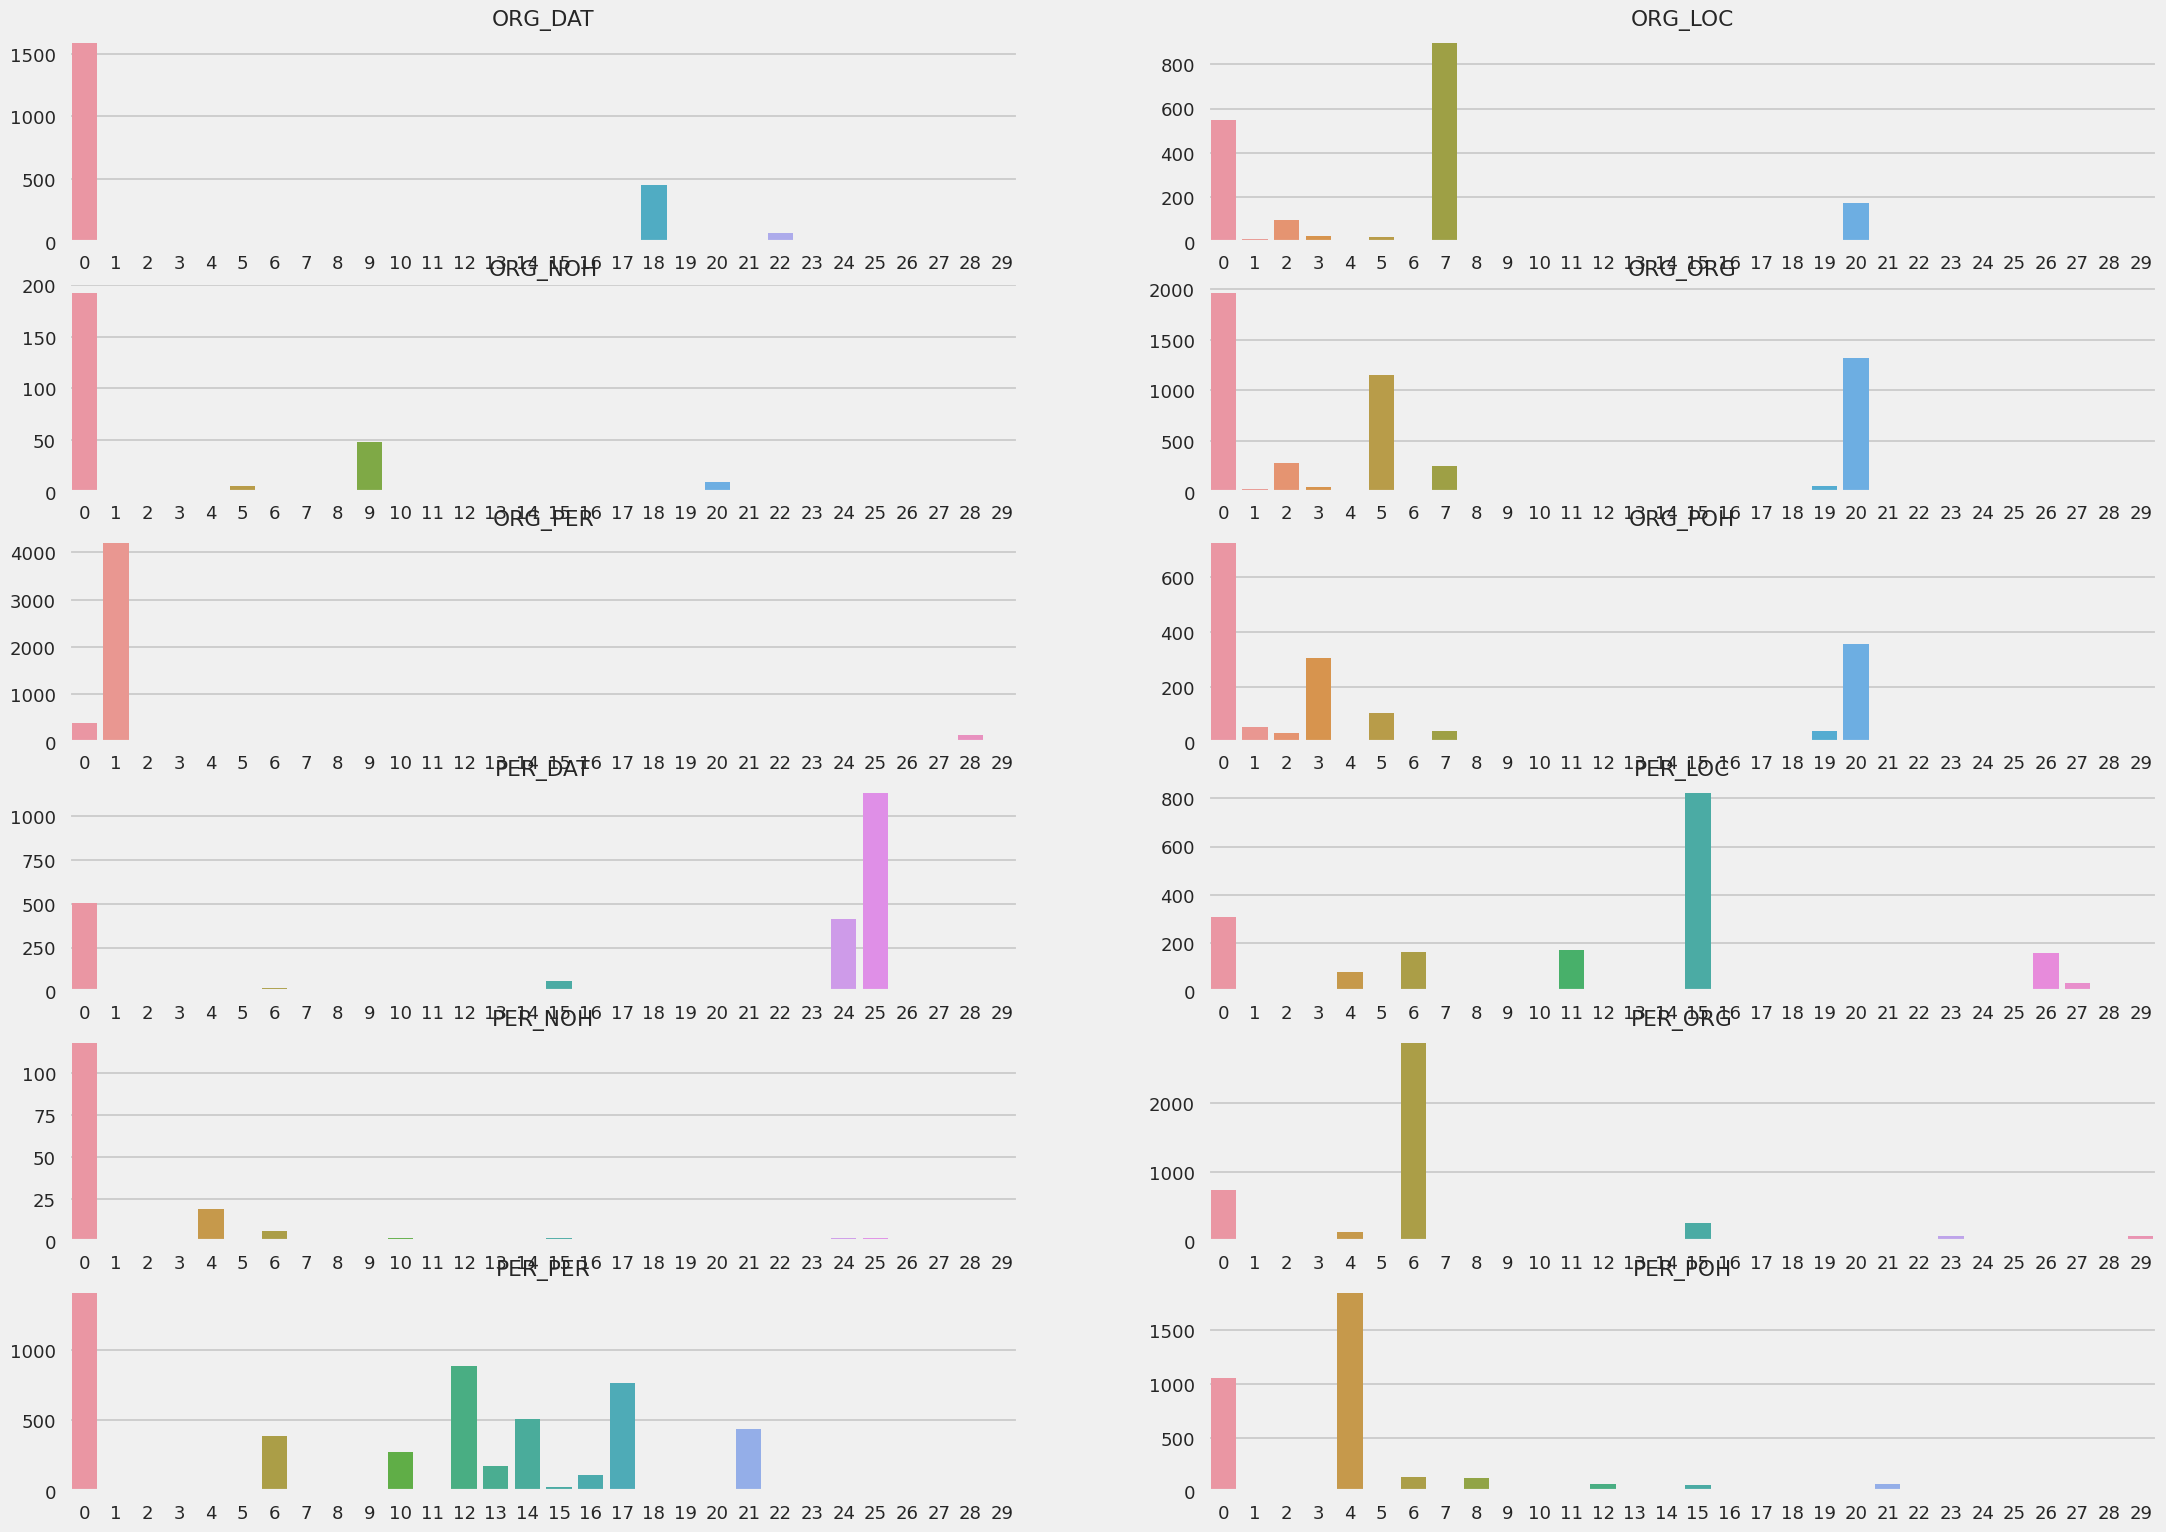

In [18]:
# sub-obj 조합에 따른 라벨 분포 확인하기 3: 시각적으로 눈에 안 띄어서, 그래프를 그려보려고 함.

import seaborn as sns
import matplotlib.pyplot as plt
import pickle


with open('./dict_label_to_num.pkl', 'rb') as f:
    label_type = pickle.load(f)
with open('./dict_num_to_label.pkl', 'rb') as f:
    num_to_label = pickle.load(f)    

fig, axes = plt.subplots(6, 2, figsize=(24, 18))

train_data['label_num'] = train_data['label'].apply(lambda x: label_type[x])
relation_unique = sorted(list(train_data['sub_obj_type'].unique()))
cnt = 0

for i in range(6):
    for j in range(2):
        sns.countplot(x='label_num', 
                      data=train_data[train_data['sub_obj_type']==relation_unique[cnt]], 
                      ax=axes[i, j], 
                      order=sorted(list(train_data['label_num'].unique())),
                      #width=1
                      )
        axes[i,j].set_title(f'{relation_unique[cnt]}')
        axes[i,j].set_xlabel("")
        axes[i,j].set_ylabel("")
        cnt += 1
        
print(f"index explained:\n")
for i in range(0, len(num_to_label), 2):
    print(f"({i}) -> {num_to_label[i]}\t\t({i+1}) -> {num_to_label[i+1]}")

Text(0, 0.5, '')

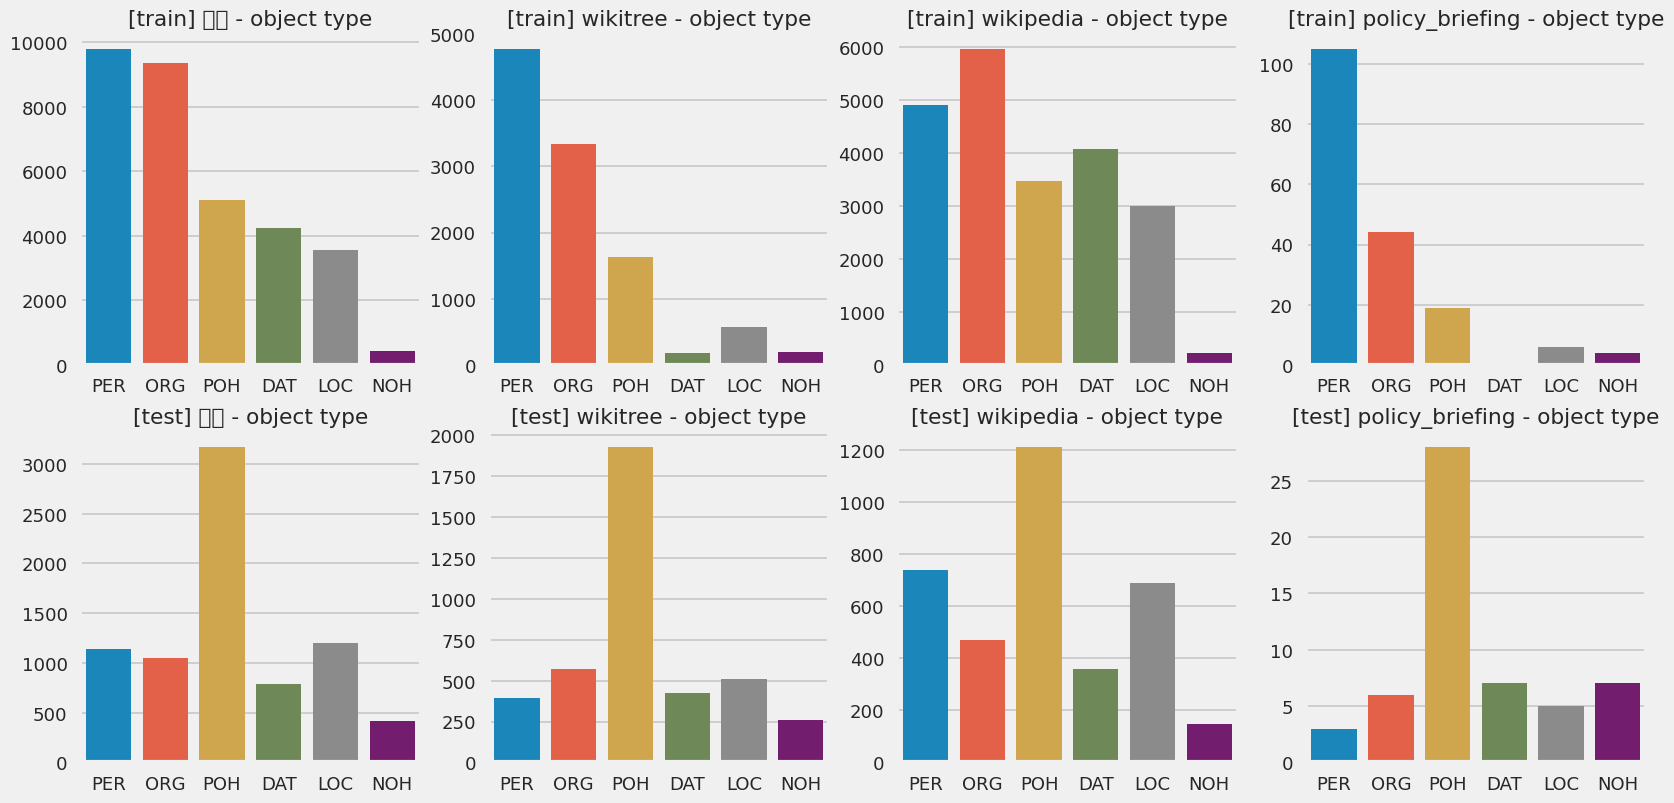

In [20]:
# 희진
train_df = train_data.copy(deep=True)
test_df = make_new_column(pd.read_csv("./test_data.csv"))

f, ax = plt.subplots(2, 4, figsize=(18, 9))
sns.countplot(x='object_type', data=train_df, ax=ax[0,0], order=train_df['object_type'].value_counts().index)
ax[0,0].set_title('[train] 전체 - object type')
ax[0,0].set_xlabel("")
ax[0,0].set_ylabel("")
sns.countplot(x='object_type', data=train_df[train_df['source']=='wikitree'], ax=ax[0,1], order=train_df['object_type'].value_counts().index)
ax[0,1].set_title('[train] wikitree - object type')
ax[0,1].set_xlabel("")
ax[0,1].set_ylabel("")
sns.countplot(x='object_type', data=train_df[train_df['source']=='wikipedia'], ax=ax[0,2], order=train_df['object_type'].value_counts().index)
ax[0,2].set_title('[train] wikipedia - object type')
ax[0,2].set_xlabel("")
ax[0,2].set_ylabel("")
sns.countplot(x='object_type', data=train_df[train_df['source']=='policy_briefing'], ax=ax[0,3], order=train_df['object_type'].value_counts().index)
ax[0,3].set_title('[train] policy_briefing - object type')
ax[0,3].set_xlabel("")
ax[0,3].set_ylabel("")

sns.countplot(x='object_type', data=test_df, ax=ax[1,0], order=train_df['object_type'].value_counts().index)
ax[1,0].set_title('[test] 전체 - object type')
ax[1,0].set_xlabel("")
ax[1,0].set_ylabel("")
sns.countplot(x='object_type', data=test_df[test_df['source']=='wikitree'], ax=ax[1,1], order=train_df['object_type'].value_counts().index)
ax[1,1].set_title('[test] wikitree - object type')
ax[1,1].set_xlabel("")
ax[1,1].set_ylabel("")
sns.countplot(x='object_type', data=test_df[test_df['source']=='wikipedia'], ax=ax[1,2], order=train_df['object_type'].value_counts().index)
ax[1,2].set_title('[test] wikipedia - object type')
ax[1,2].set_xlabel("")
ax[1,2].set_ylabel("")
sns.countplot(x='object_type', data=test_df[test_df['source']=='policy_briefing'], ax=ax[1,3], order=train_df['object_type'].value_counts().index)
ax[1,3].set_title('[test] policy_briefing - object type')
ax[1,3].set_xlabel("")
ax[1,3].set_ylabel("")

In [ ]:
cnt=0
f, ax = plt.subplots(5, 5, figsize=(18, 22))
for i in range(5):
    for j in range(5):
        sns.countplot(x='object_type', data=train_df[train_df['label_num']==cnt], ax=ax[i,j], order=train_df['object_type'].value_counts().index)
        ax[i,j].set_title(f'({cnt}){num_to_label[cnt]}')
        ax[i,j].set_xlabel("")
        ax[i,j].set_ylabel("")
        cnt+=1

In [ ]:
# 재원

import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
# Iterate over each unique label in the result DataFrame
for label in result['label'].unique():
    # Filter the DataFrame for the current label
    label_data = result[result['label'] == label].reset_index(drop=True)
    label_count = label_data['count'].sum()
    if label_count >= 500:
        continue
    # Create a bar plot for the current label
        
    plt.figure(figsize=(10, 6))
    sns.barplot(x=label_data[['subject_entity', 'object_entity']].apply(tuple, axis=1), y='count', data=label_data)
    plt.title(f"Label: {label}, count: {label_count}")
    plt.xlabel("Entity Pairs (Subject, Object)")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.show()